In [1]:
import pandas as pd

from experiment.scenario import *
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Reconstruction Optimization of Experiment with Random Error

In [2]:
from experiment_setup.exp_random_error import *

## Load optimization results

Set up or load the experiment:

In [3]:
e.setup()
len(e)

Saving experiment configuration ...
Saving scenario configurations ...


25

In [3]:
e = Experiment.load(Path(experiment_dirpath, experiment_name))
len(e)

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...


25

Choose a scenario, setup optimization experiment (or load?), and load its scenarios:

In [4]:
# sc = e[10]
sc = e[14]

In [5]:
sc.setup_reconstruction_optimization()

Setting up reconstruction optimization ...
Saving experiment configuration ...
Saving scenario configurations ...


In [6]:
sc.recon_optim.optim_experiment.load_scenarios()
len(sc.recon_optim.optim_experiment)

100

In [7]:
e_opt = sc.recon_optim.optim_experiment

Prepare the Evaluators if the summary stats should be newly computed:

In [ ]:
sc.recon_optim.optim_experiment.run_steps(Scenario.setup_evaluation, lods=["2.2"])

## Run optimization

In [4]:
e.setup()
len(e)

25

In [5]:
# sc = e[10]
sc = e[14]

In [6]:
sc.setup_reconstruction_optimization()

Setting up reconstruction optimization ...


In [ ]:
sc.prepare_reconstruction_optimization()

After an interruption, load the optimizer state from the optimization log file:

In [ ]:
log_fp = r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization\scenario_010\optimization_240829-131835.log"
sc.recon_optim.load_optimizer_state([log_fp])
sc.recon_optim.past_target_values.__len__()  # number of actual target values, excluding zero-buildings cases

In [ ]:
sc.run_reconstruction_optimization(init_points=20, n_iter=80)

To execute more Evaluators, set up all evaluators for the required LOD:

In [ ]:
sc.recon_optim.optim_experiment.run_steps(Scenario.setup_evaluation, lods=["2.2"])

In [ ]:
# sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection="complexity")
# sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection=["height", "area_volume_diff"])
sc.recon_optim.optim_experiment.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "height", "area_volume_diff", "geoflow_output"])

In [ ]:
# sc.recon_optim.optim_experiment.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff"])
sc.recon_optim.optim_experiment.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff", "complexity", "height", "area_volume_diff", "geoflow_output"])

## (Experimental) Load a different optimization experiment for evaluation

In [14]:
e_opt = Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization\scenario_014")

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [13]:
e_opt.run_steps(Scenario.setup_evaluation, lods=["2.2"])

Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.099519.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.036994.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.035712.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.034020.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.039035.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.041630.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.040271.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.032939.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after 

In [14]:
e_opt.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff", "complexity", "height", "area_volume_diff", "geoflow_output"])

Computing summary statistics from all scenarios ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.057008.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.039025.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.038797.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.037996.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.035941.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.045938.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.036829.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.043572.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.041000.

Starting Ge

In [15]:
# Take summary statistics from loaded experiment
s = e_opt.summary_stats
s

pulse_freq_hz  point_spacing_along  point_spacing_across  \
name                                                                   
optim_0000         125000             0.277794              0.092598   
optim_0001         125000             0.277794              0.092598   
optim_0002         125000             0.277794              0.092598   
optim_0003         125000             0.277794              0.092598   
optim_0004         125000             0.277794              0.092598   
...                   ...                  ...                   ...   
optim_0095         125000             0.277794              0.092598   
optim_0096         125000             0.277794              0.092598   
optim_0097         125000             0.277794              0.092598   
optim_0098         125000             0.277794              0.092598   
optim_0099         125000             0.277794              0.092598   

            std_horizontal_error  std_vertical_error  r_plane_epsilon  \
name                                                                    
optim_0000                   0.0                 0.0         1.100671   
optim_0001                   0.0                 0.0         0.040671   
optim_0002                   0.0                 0.0         0.653598   
optim_0003                   0.0                 0.0         0.307514   
optim_0004                   0.0                 0.0         1.448792   
...                          ...                 ...              ...   
optim_0095                   0.0                 0.0         1.500000   
optim_0096                   0.0                 0.0         0.010000   
optim_0097                   0.0                 0.0         1.500000   
optim_0098                   0.0                 0.0         1.500000   
optim_0099                   0.0                 0.0         1.500000   

            r_plane_k  r_plane_min_points  r_plane_normal_angle  thres_alpha  \
name                                                                           
optim_0000         62                  24                  0.75     0.164435   
optim_0001         97                  85                  0.75     0.220216   
optim_0002         33                  65                  0.75     0.148099   
optim_0003         54                  63                  0.75     0.055986   
optim_0004         82                  37                  0.75     0.106695   
...               ...                 ...                   ...          ...   
optim_0095         20                  74                  0.75     1.000000   
optim_0096         18                  62                  0.75     1.000000   
optim_0097         31                  75                  0.75     1.000000   
optim_0098         30                  79                  0.75     0.010000   
optim_0099         35                  78                  0.75     1.000000   

            ...  volume_22_norm_rms_abs_diff  gpkg_total_22  gpkg_unique_22  \
name        ...                                                               
optim_0000  ...                     0.027196             89              89   
optim_0001  ...                     0.029399             77              77   
optim_0002  ...                     0.033046             89              89   
optim_0003  ...                     0.027988             89              89   
optim_0004  ...                     0.030185             89              89   
...         ...                          ...            ...             ...   
optim_0095  ...                     0.062911             89              89   
optim_0096  ...                     0.041987             89              89   
optim_0097  ...                     0.034903             89              89   
optim_0098  ...                     0.175072              4               4   
optim_0099  ...                     0.034445             87              87   

            gpkg_multiple_22  cj_buildings  cj_building_

## Load multiple optimization experiments

In [131]:
exp_dirpath = Path(r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization")
# exp_names = ["scenario_014_hausdorff_narrow_ranges", "scenario_014_rms-min-dist_narrow_ranges"]
# exp_names = ["scenario_010_iou_narrow_ranges", "scenario_010_hausdorff_narrow_ranges"]
exp_names = ["scenario_010_hausdorff_narrow_ranges", "scenario_014_hausdorff_narrow_ranges"]
es = [Experiment.load(exp_dirpath / name) for name in exp_names]

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [126]:
s = es[0].summary_stats

## Evaluation

### Summary stats

In [7]:
# Take summary statistics from last executed optimization experiment
s = sc.recon_optim.optim_experiment.summary_stats
s

Loading summary statistics from file ...


name  pulse_freq_hz  point_spacing_along  point_spacing_across  \
0   optim_0000         125000             0.277794              0.092598   
1   optim_0001         125000             0.277794              0.092598   
2   optim_0002         125000             0.277794              0.092598   
3   optim_0003         125000             0.277794              0.092598   
4   optim_0004         125000             0.277794              0.092598   
..         ...            ...                  ...                   ...   
95  optim_0095         125000             0.277794              0.092598   
96  optim_0096         125000             0.277794              0.092598   
97  optim_0097         125000             0.277794              0.092598   
98  optim_0098         125000             0.277794              0.092598   
99  optim_0099         125000             0.277794              0.092598   

    std_horizontal_error  std_vertical_error  r_plane_epsilon  r_plane_k  \
0                    1.0                 0.3         1.490788         22   
1                    1.0                 0.3         1.445338         10   
2                    1.0                 0.3         0.678060         20   
3                    1.0                 0.3         0.796088         19   
4                    1.0                 0.3         1.254335         13   
..                   ...                 ...              ...        ...   
95                   1.0                 0.3         1.610596         20   
96                   1.0                 0.3         1.012304         13   
97                   1.0                 0.3         0.676104         14   
98                   1.0                 0.3         1.000053         12   
99                   1.0                 0.3         0.100379         15   

    r_plane_min_points  r_plane_normal_angle  ...  \
0                   22                  0.75  ...   
1                   10                  0.75  ...   
2                   20                  0.75  ...   
3                   19                  0.75  ...   
4                   13                  0.75  ...   
..                 ...                   ...  ...   
95                  20                  0.75  ...   
96                  13                  0.75  ...   
97                  14                  0.75  ...   
98                  12                  0.75  ...   
99                  15                  0.75  ...   

    volume_22_norm_rms_abs_diff  gpkg_total_22  gpkg_unique_22  \
0                      0.070249             87              87   
1                      0.080354             86              86   
2                      0.092780             87              87   
3                      0.104034             87              87   
4                      0.031530             83              83   
..                          ...            ...             ...   
95                     0.078210             84              84   
96                     0.055260             88              88   
97                     0.062277             87              86   
98                     0.065710             87              87   
99                     0.209239             36              36   

    gpkg_multiple_22  cj_buildings  cj_building_parts  cj_buildings_with_bp  \
0                  0            90                 87                    87   
1                  0            90                 86                    86   
2                  0            90                 87                    87   
3                  0            90                 87                    87   
4                  0            90                 83                    83   
..               ...           ...                ...                   ...   
95                 0            90                 84                    84   
96                 0            90                 88                    88   
97                 1            90         

In [ ]:
list(s.columns)

Results for the best values of IOU, Hausdorff, RMS minimum distance.

In [132]:
def get_best_results(s: pd.DataFrame):
    columns = []
    columns.extend(list(glb.geoflow_parameters_default.keys()))
    columns.extend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
    columns.extend(["n_faces_22_mean", "n_faces_22_std"])
    columns.extend(["area_22_mean_abs_diff"])
    
    return s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

for e in es:
    display(get_best_results(e.summary_stats))

Loading summary statistics from file ...


r_plane_epsilon  r_plane_k  r_plane_min_points  r_plane_normal_angle  \
45              0.1         21                  21                  0.75   

    thres_alpha  r_line_epsilon  thres_reg_line_dist  thres_reg_line_ext  \
45     0.138055        0.395073             0.368081            2.309309   

    r_optimisation_data_term  r_normal_k  iou_22_mean  hausdorff_22_rms  \
45                  9.494341           5     0.981652          0.687046   

    rms_min_dist_22_mean  n_faces_22_mean  n_faces_22_std  \
45              0.051541       188.573034      138.468891   

    area_22_mean_abs_diff  
45               2.044226

Loading summary statistics from file ...


r_plane_epsilon  r_plane_k  r_plane_min_points  r_plane_normal_angle  \
7          0.797620         29                  29                  0.75   
36         0.974937         28                  28                  0.75   
91         0.805108         12                  12                  0.75   

    thres_alpha  r_line_epsilon  thres_reg_line_dist  thres_reg_line_ext  \
7      0.457931        0.266369             0.638110            2.843748   
36     0.396057        0.467060             0.317389            2.397162   
91     0.399429        0.927292             0.241738            2.477593   

    r_optimisation_data_term  r_normal_k  iou_22_mean  hausdorff_22_rms  \
7                   9.847923           5     0.880574          1.496942   
36                  9.711326           5     0.874342          1.357610   
91                  6.408152           5     0.849744          1.335731   

    rms_min_dist_22_mean  n_faces_22_mean  n_faces_22_std  \
7               0.262201       180.858974      220.968102   
36              0.245525       283.084337      358.528742   
91              0.265130       400.712644      472.629062   

    area_22_mean_abs_diff  
7               37.585537  
36              37.862389  
91              47.091121

### Optimization overview plot

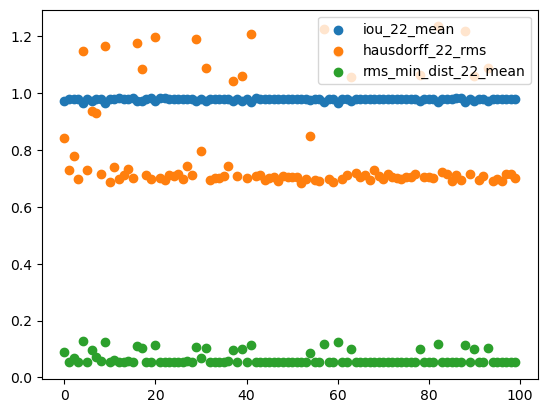

In [128]:
plt.scatter(range(100), s["iou_22_mean"])
plt.scatter(range(100), s["hausdorff_22_rms"])
plt.scatter(range(100), s["rms_min_dist_22_mean"])
plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

### Plot functions

In [41]:
opt_params = [m.split("_", 1)[1] for m in glb.geoflow_optim_parameter_space.keys()]

def plot_metric_vs_parameter(es: list[Experiment] | Experiment, target_metric: str):
    if isinstance(es, Experiment):
        es = [es]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(opt_params), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="all", layout="constrained")
    
    for i, opt_param in enumerate(opt_params):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]
            s.plot.scatter(opt_param, target_metric, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [61]:
def plot_metric_vs_metric(es: list[Experiment] | Experiment, x, ys):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(ys), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", sharex="row", layout="constrained")
    
    for i, y in enumerate(ys):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                if nrows == 1:
                    ax = axs[j]
                else:
                    ax = axs[i, j]
            s.plot.scatter(x, y, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [107]:
def plot_metric_vs_metric_2(es: list[Experiment] | Experiment, xs, ys, **kwargs):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    n_dependents = len(ys)
    n_independents = len(xs)
    nrows, ncols = n_independents * n_dependents, len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", layout="constrained")
    
    for h, x in enumerate(xs):
        for i, y in enumerate(ys):
            for j, s in enumerate(stats):
                if ncols == 1:
                    ax = axs[i]
                else:
                    if nrows == 1:
                        ax = axs[j]
                    else:
                        ax = axs[(h * n_dependents) + i, j]
                s.plot.scatter(x, y, ax=ax, **kwargs)
                if (h + i) == 0:
                    ax.set_title(es[j].name)
                # if (i + 1) == len(ys):
                #     ax.tick_params(axis="both", reset=True)
        
    plt.show()

### Influence of parameters on target metrics

Check influence on:
- iou_22_mean
- hausdorff_22_rms
- rms_min_dist_22_mean
- n_faces_22_mean

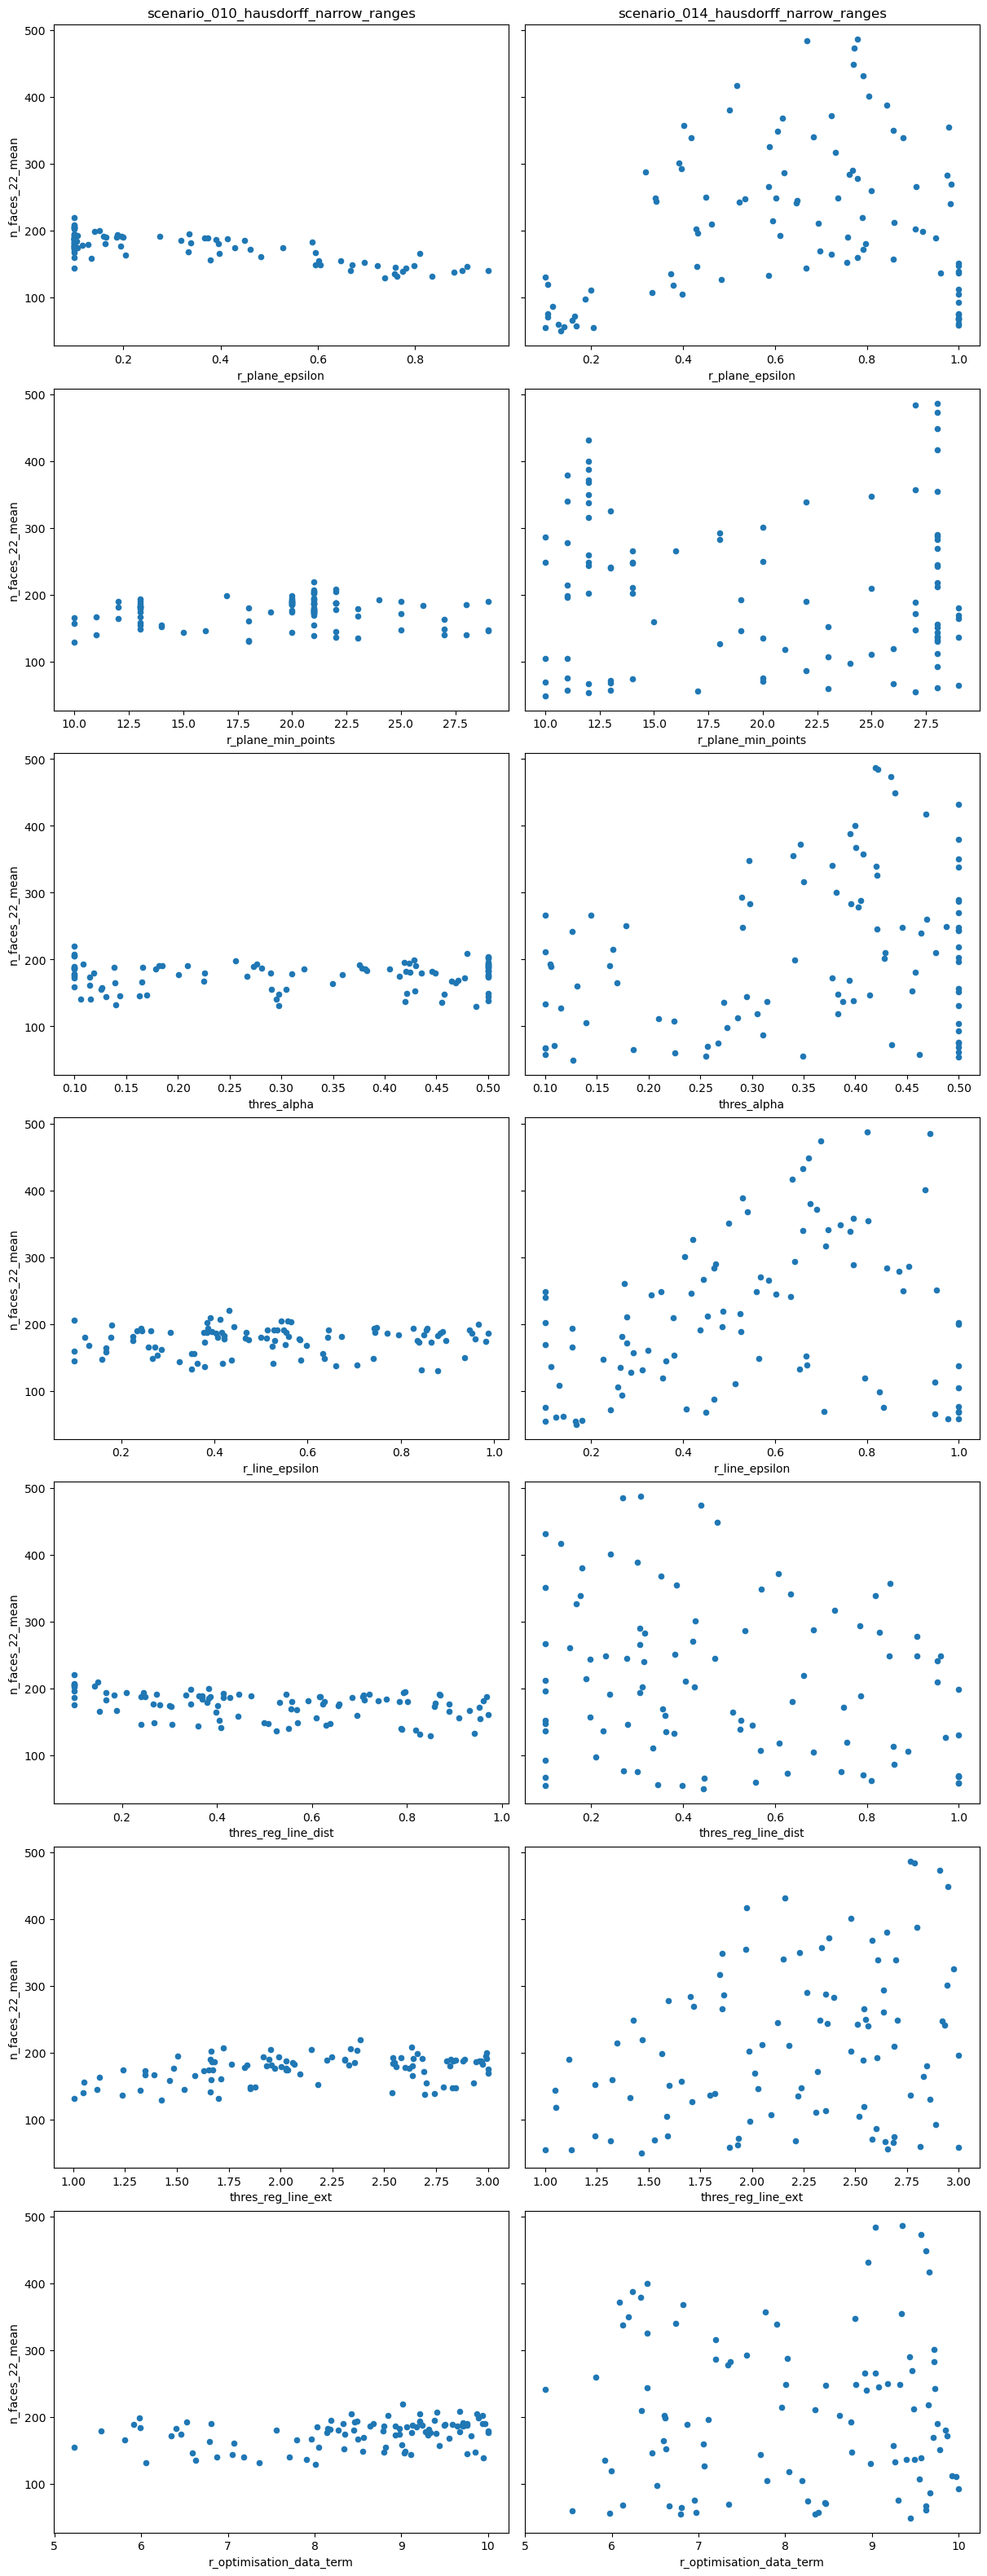

In [140]:
plot_metric_vs_parameter(es, "n_faces_22_mean")

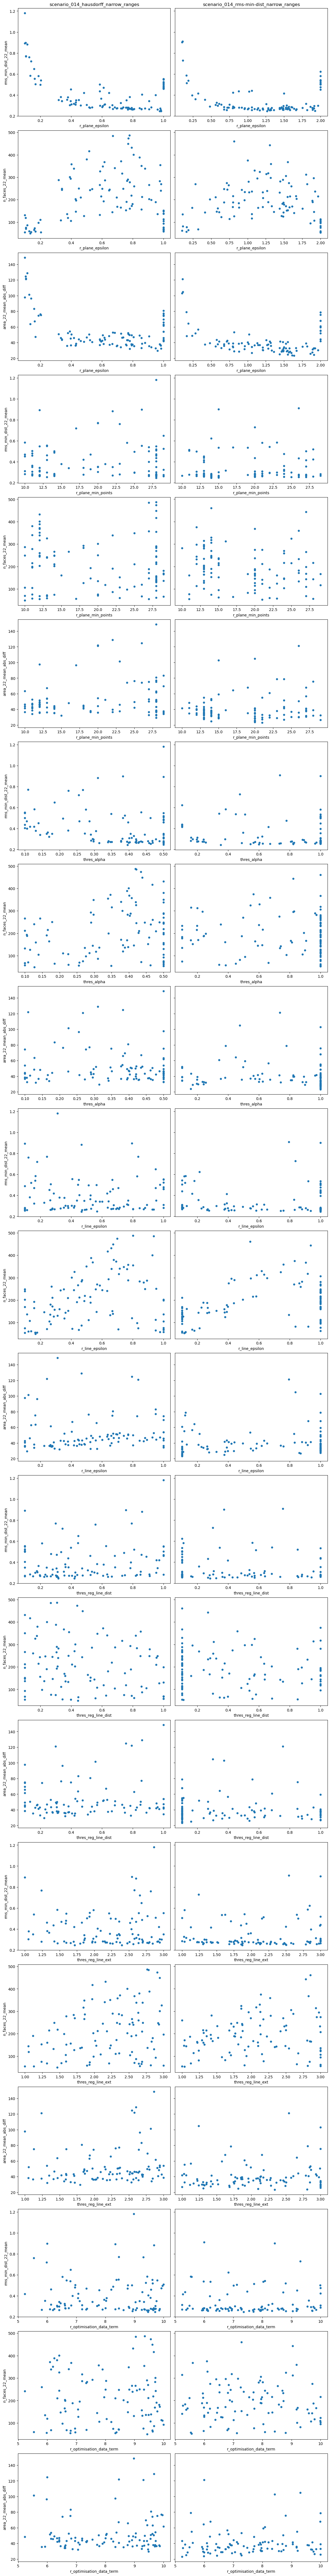

In [105]:
plot_metric_vs_metric_2(es, opt_params, ["rms_min_dist_22_mean", "n_faces_22_mean", "area_22_mean_abs_diff"])

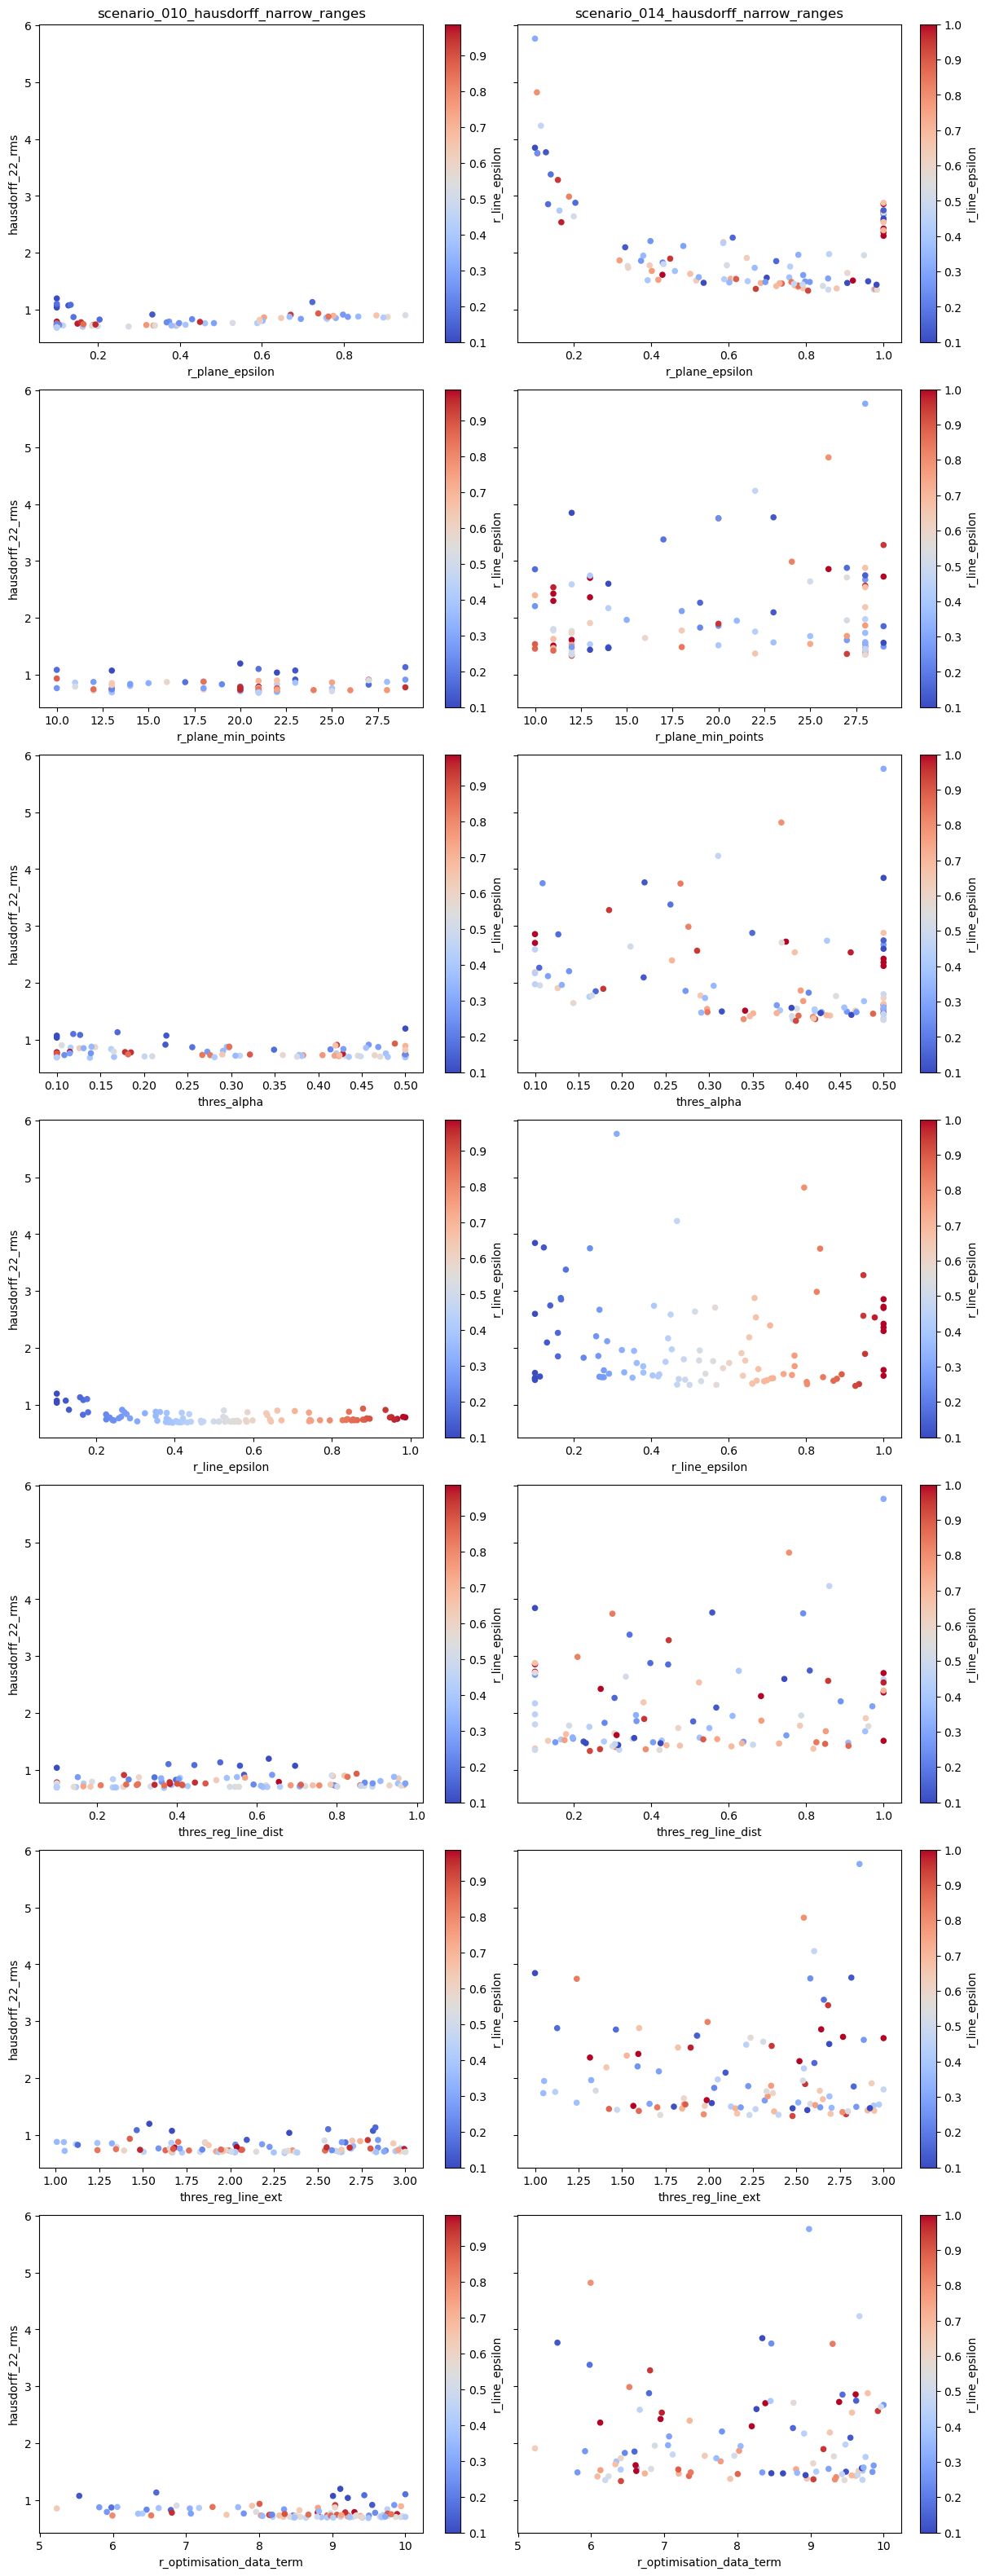

In [137]:
plot_metric_vs_metric_2(es, opt_params, ["hausdorff_22_rms"], c="r_line_epsilon", colormap="coolwarm")

### Interactions of parameters w.r.t. target metrics

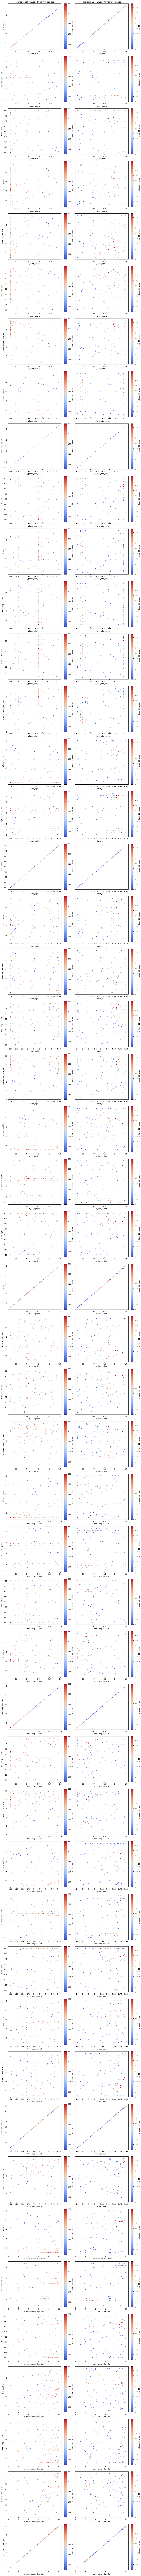

In [139]:
plot_metric_vs_metric_2(es, opt_params, opt_params, c="n_faces_22_mean", colormap="coolwarm")

### Target metrics correlation 

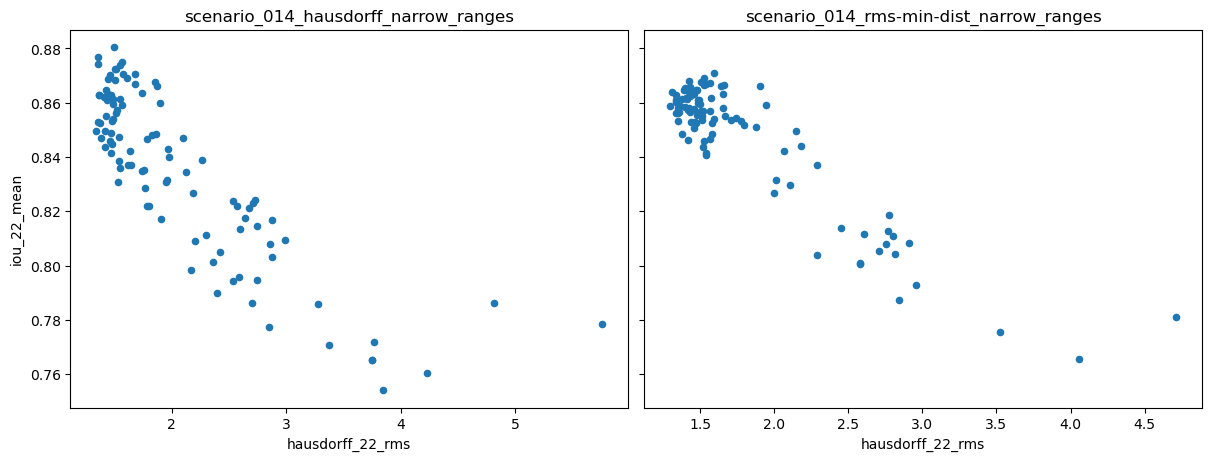

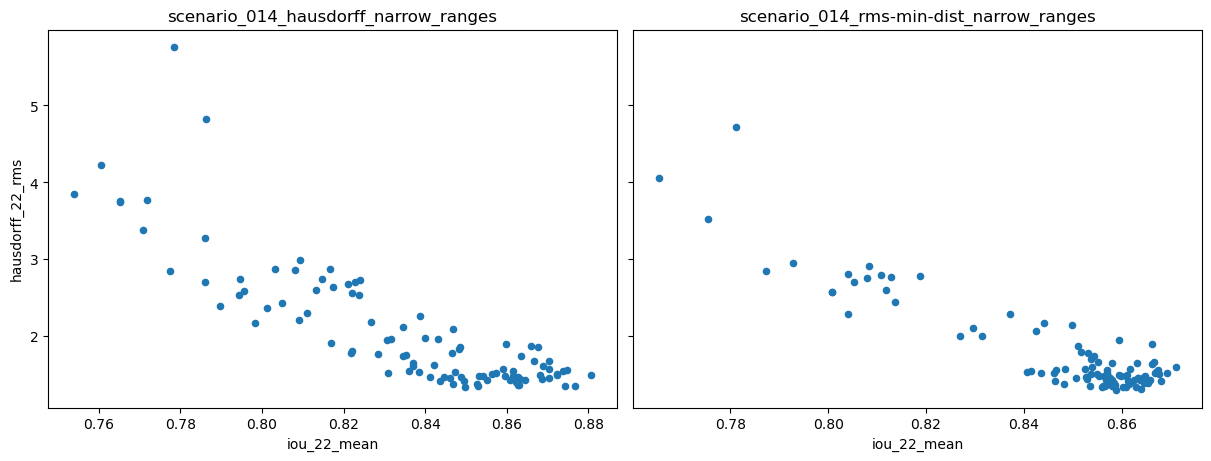

In [94]:
plot_metric_vs_metric_2(es, "hausdorff_22_rms", "iou_22_mean")
plot_metric_vs_metric_2(es, "iou_22_mean", "hausdorff_22_rms")

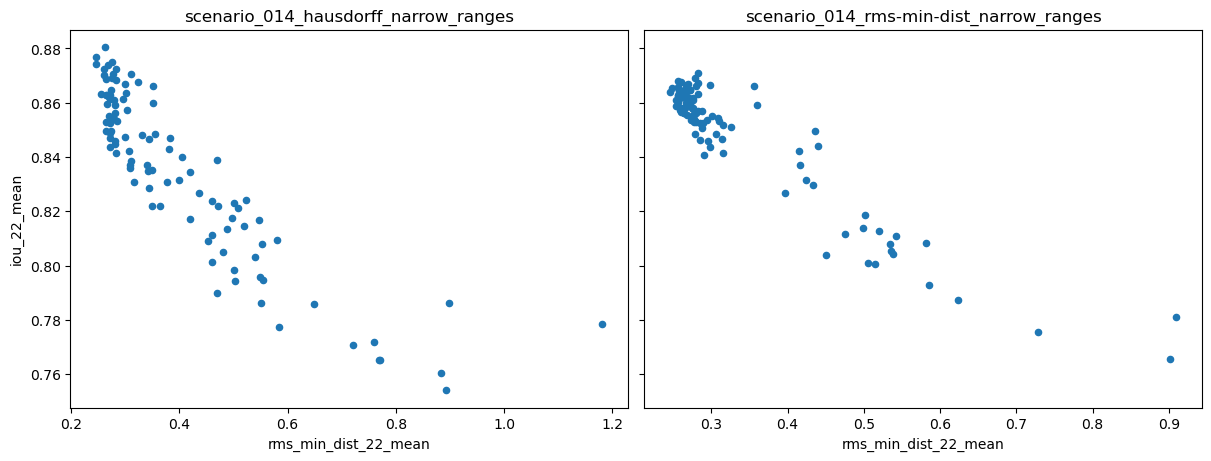

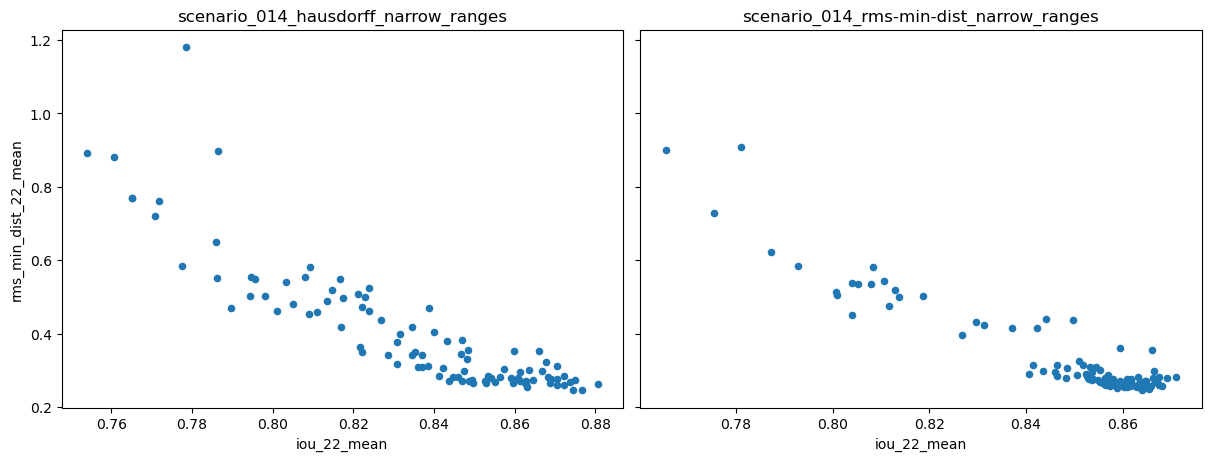

In [95]:
plot_metric_vs_metric_2(es, "rms_min_dist_22_mean", "iou_22_mean")
plot_metric_vs_metric_2(es, "iou_22_mean", "rms_min_dist_22_mean")

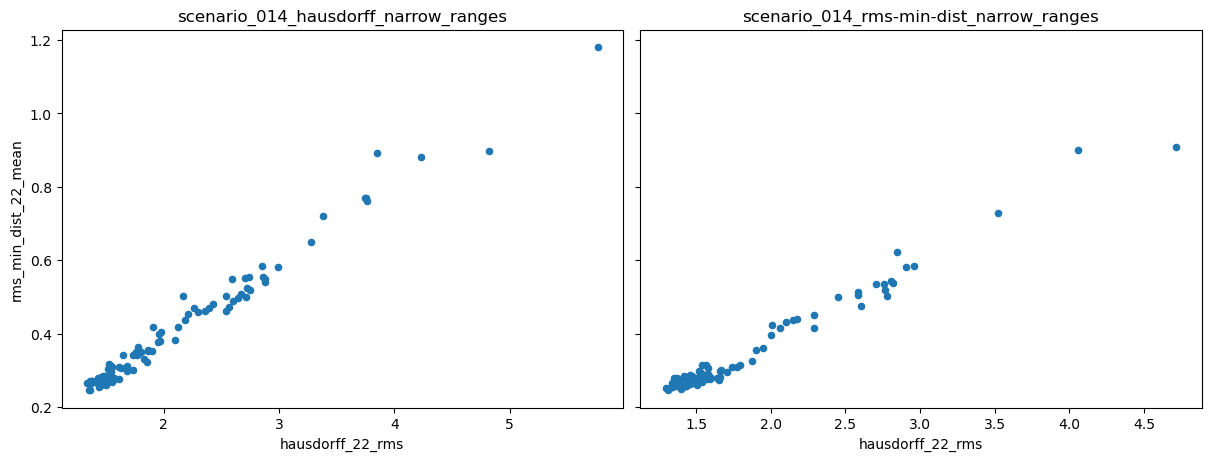

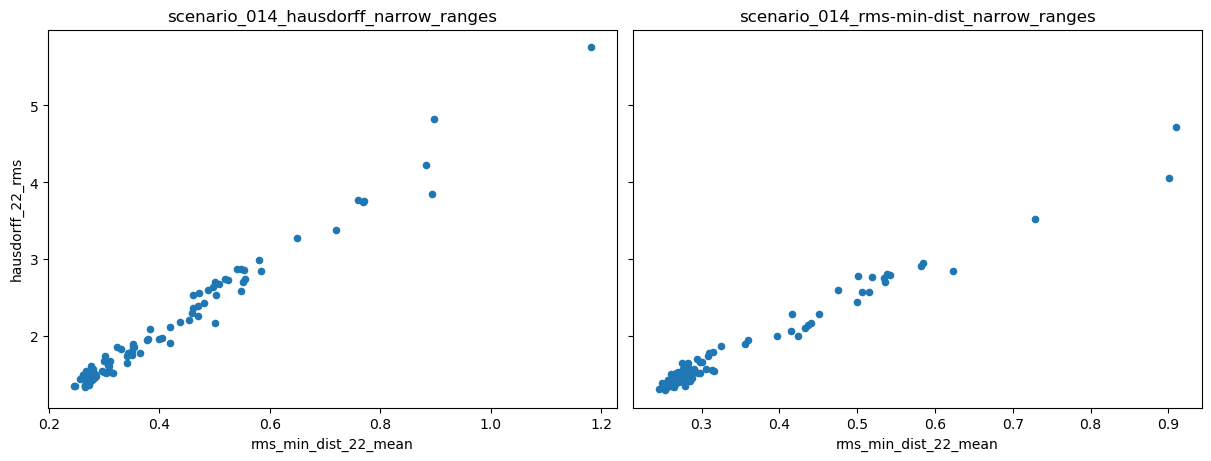

In [96]:
plot_metric_vs_metric_2(es, "hausdorff_22_rms", "rms_min_dist_22_mean")
plot_metric_vs_metric_2(es, "rms_min_dist_22_mean", "hausdorff_22_rms")

In [ ]:
ax = s.plot.scatter("iou_22_mean", "hausdorff_22_rms")
# plt.xlim(0.98, 0.9825)
# plt.ylim(0.67, 0.77)
ax = s.plot.scatter("hausdorff_22_rms", "iou_22_mean")

In [ ]:
s.plot.scatter("iou_22_mean", "rms_min_dist_22_mean")
# plt.xlim(0.98, 0.9825)
# plt.ylim(0.05, 0.06)
s.plot.scatter("rms_min_dist_22_mean", "iou_22_mean")

In [ ]:
s.plot.scatter("hausdorff_22_rms", "rms_min_dist_22_mean")
s.plot.scatter("rms_min_dist_22_mean", "hausdorff_22_rms")

### Target metrics vs. complexity

In [ ]:
s.plot.scatter("n_faces_22_mean", "iou_22_mean")
s.plot.scatter("n_faces_22_mean", "hausdorff_22_rms")
plt.ylim(1, 2)
s.plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")
plt.ylim(.2, .4)

In [ ]:
plot_metric_vs_metric_2(es, "n_faces_22_mean", ["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])

### Derived metrics vs. complexity

In [ ]:
s.plot.scatter("n_faces_22_mean", "volume_22_mean_abs_diff")
s.plot.scatter("n_faces_22_mean", "area_22_mean_abs_diff")
s.plot.scatter("n_faces_22_mean", "h_70p_mean_abs_diff")

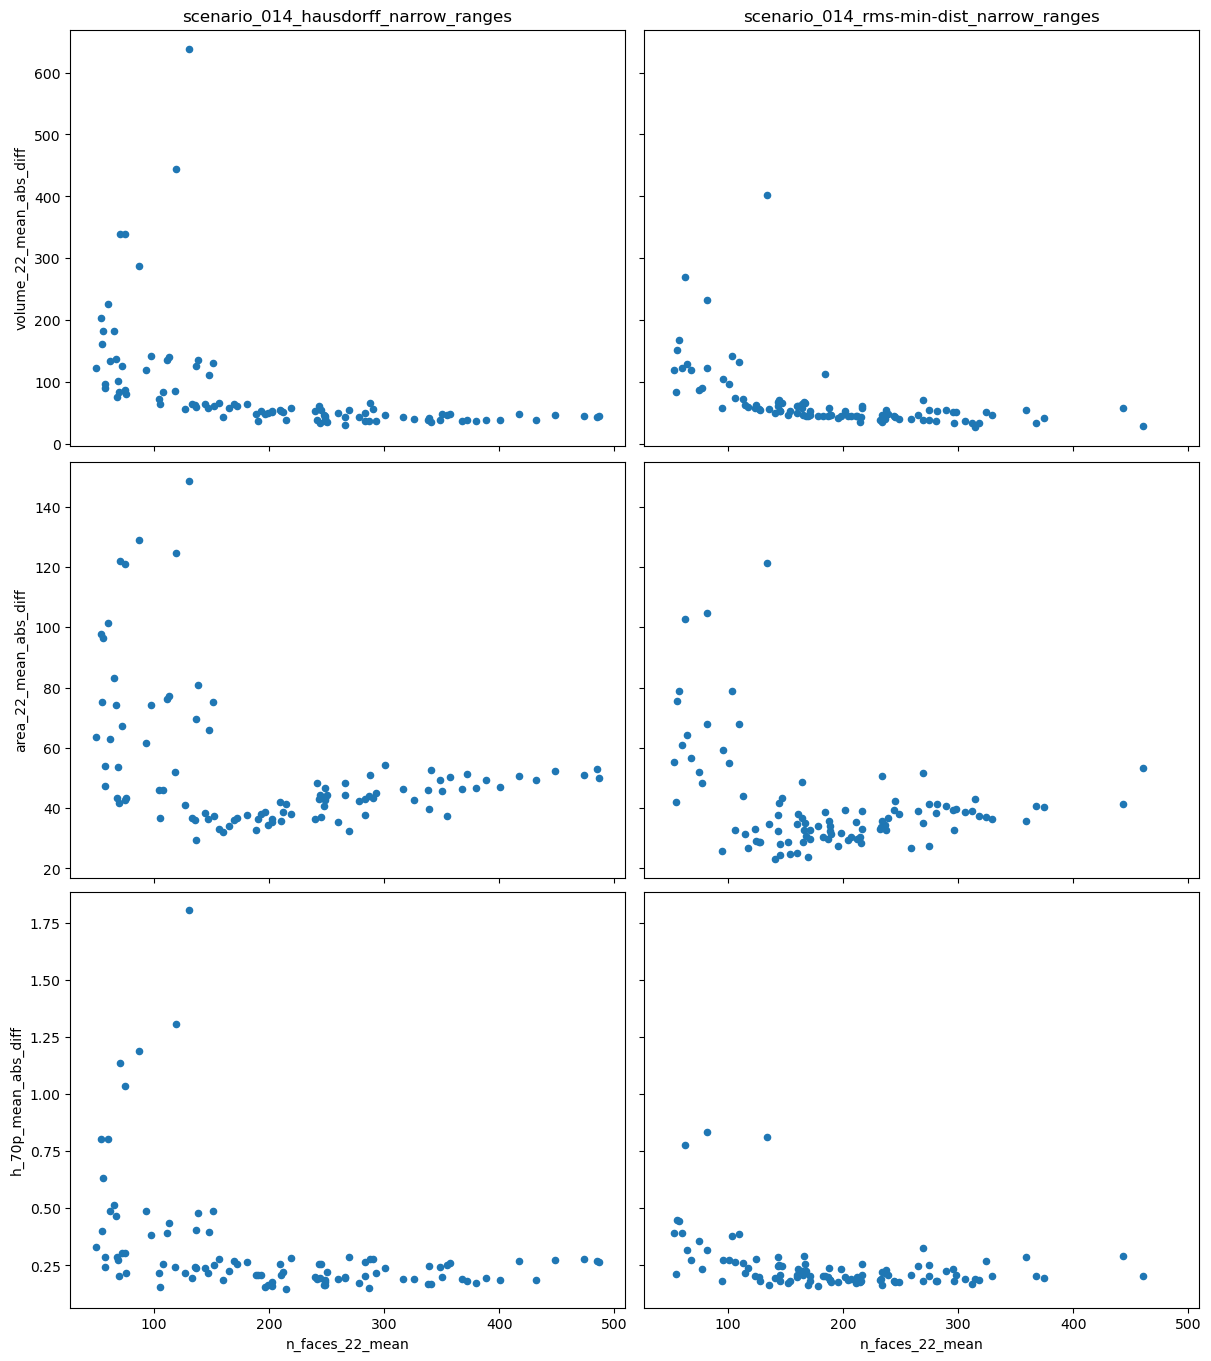

In [80]:
plot_metric_vs_metric_2(es, "n_faces_22_mean", ["volume_22_mean_abs_diff", "area_22_mean_abs_diff", "h_70p_mean_abs_diff"])

### Influence of complexity on target metrics and area difference

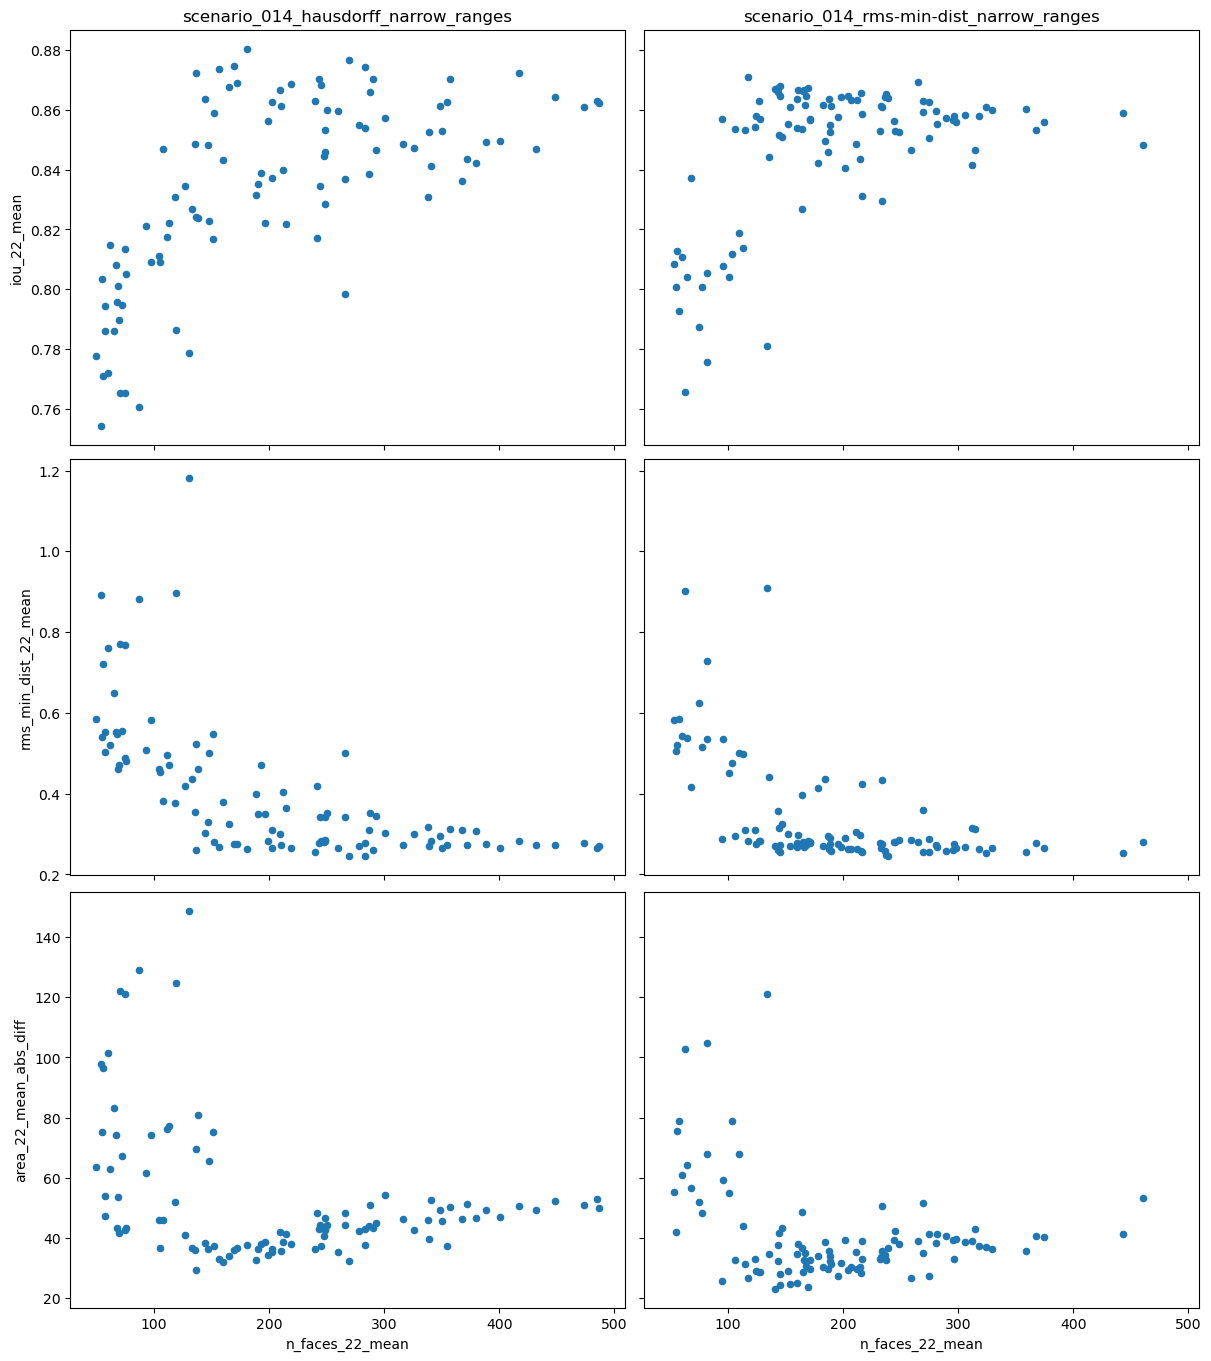

In [98]:
plot_metric_vs_metric(es, "n_faces_22_mean", ["iou_22_mean", "rms_min_dist_22_mean", "area_22_mean_abs_diff"])

### Volume diff vs. target metrics

In [ ]:
plot_metric_vs_metric_2(es, ["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"], "volume_22_mean_abs_diff")

In [ ]:
s.plot.scatter("iou_22_mean", "volume_22_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "volume_22_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "volume_22_mean_abs_diff")

### Area diff vs. target metrics

In [ ]:
plot_metric_vs_metric_2(es, ["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"], "area_22_mean_abs_diff")

In [ ]:
s.plot.scatter("iou_22_mean", "area_22_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "area_22_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "area_22_mean_abs_diff")

### Height diff vs. target metrics

In [ ]:
plot_metric_vs_metric_2(es, ["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"], "h_70p_mean_abs_diff")

In [ ]:
s.plot.scatter("iou_22_mean", "h_70p_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "h_70p_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "h_70p_mean_abs_diff")

### Volume, area, and height diff vs. target metrics

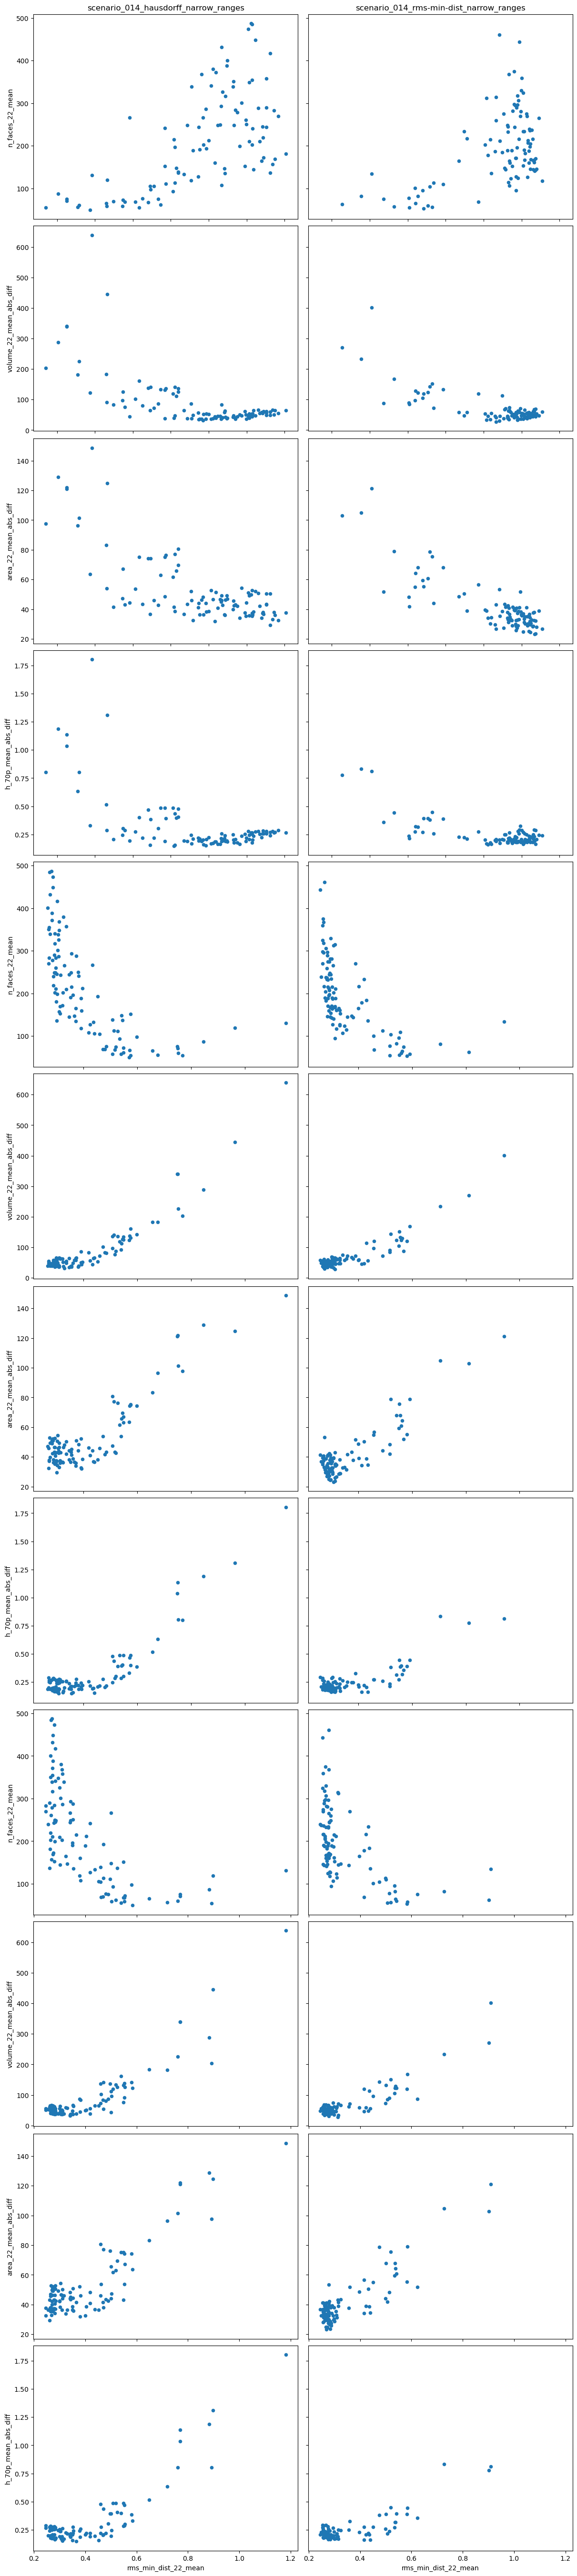

In [86]:
plot_metric_vs_metric_2(es, ["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"], ["n_faces_22_mean", "volume_22_mean_abs_diff", "area_22_mean_abs_diff", "h_70p_mean_abs_diff"])